In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns

Вся информация о графах была взята с сайта algorithm-archive, а именно:\
Папоротник Барнсли: https://www.algorithm-archive.org/contents/barnsley/barnsley.html \
Треугольник Серпинского: https://www.algorithm-archive.org/contents/IFS/IFS.html

### 1. Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

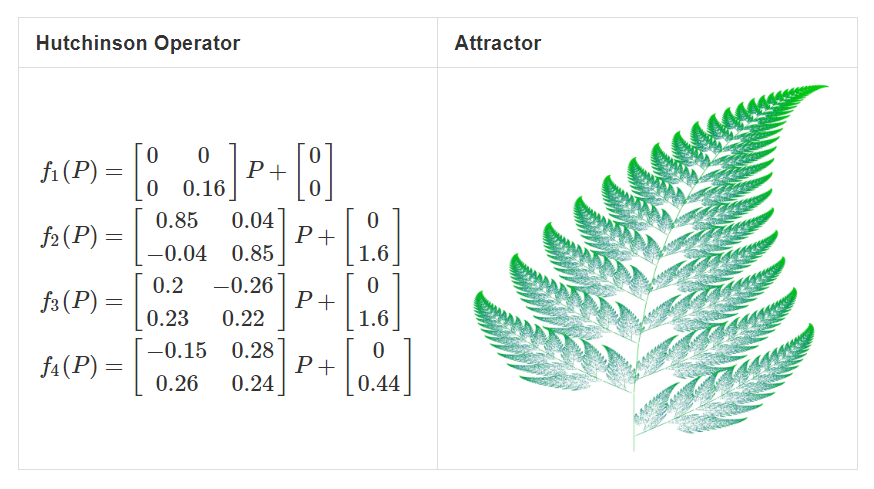

In [ ]:
def barnsley_fern(n):
  G = nx.Graph()
  x, y = 0, 0
  for _ in range(n):
    prob = random.uniform(1, 100)
    if prob < 2:
      x, y = 0, 0.16 * y
    elif prob < 86:
      x, y = 0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.6
    elif prob < 93:
      x, y = 0.2 * x - 0.26 * y, 0.23 * x + 0.22 * y + 1.6
    else:
      x, y = -0.15 * x + 0.28 * y, 0.26 * x + 0.24 * y + 0.44
    G.add_node((x, y))
  return G


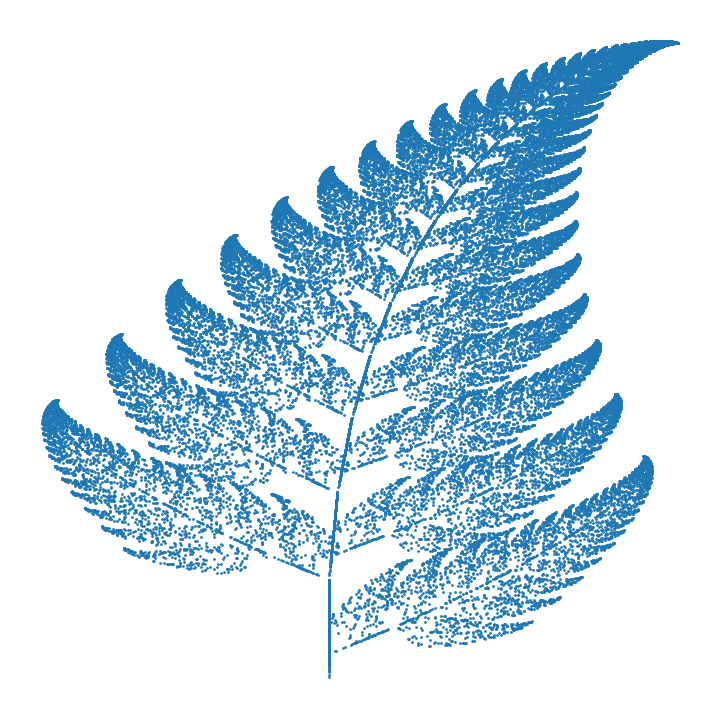

In [ ]:
bern_graph = barnsley_fern(50000)

pos = {node: node for node in bern_graph.nodes()}
plt.figure(figsize=(7, 7))
nx.draw(bern_graph, pos, node_size=1, with_labels=False)
plt.show()

К сожалению, Папоротник Барнсли строится только с помощью узлов, без связей, поэтому дальнейшая работа с ним невозможна.

In [ ]:
def midpoint(p1, p2):
  return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

In [ ]:
def add_triangle(G, n, pos, u, v, w):
  if n == 0:
    return
  p1 = midpoint(u, v)
  p2 = midpoint(v, w)
  p3 = midpoint(u, w)
  nodes = [p1, p2, p3]
  for i, p in enumerate(nodes):
    if p not in pos:
      pos[p] = p
    G.add_node(p)
    if i > 0:
      G.add_edge(nodes[i-1], p)
    else:
      G.add_edge(nodes[-1], p)
  G.add_edge(nodes[-1], nodes[0])
  add_triangle(G, n-1, pos, u, nodes[0], nodes[2])
  add_triangle(G, n-1, pos, nodes[0], v, nodes[1])
  add_triangle(G, n-1, pos, nodes[2], nodes[1], w)

In [ ]:
def draw_sierpinski_triangle(depth):
    G = nx.Graph()
    u = (0, 0)
    v = (1, 0)
    w = (0.5, 0.5*(3**0.5))
    pos = {u: u, v: v, w: w}
    G.add_nodes_from([u, v, w])
    G.add_edges_from([(u, v), (v, w), (w, u)])
    add_triangle(G, depth, pos, u, v, w)

    plt.figure(figsize=(7, 7))
    nx.draw(G, pos, node_size=2, width=0.5, with_labels=False)
    plt.show()
    return G

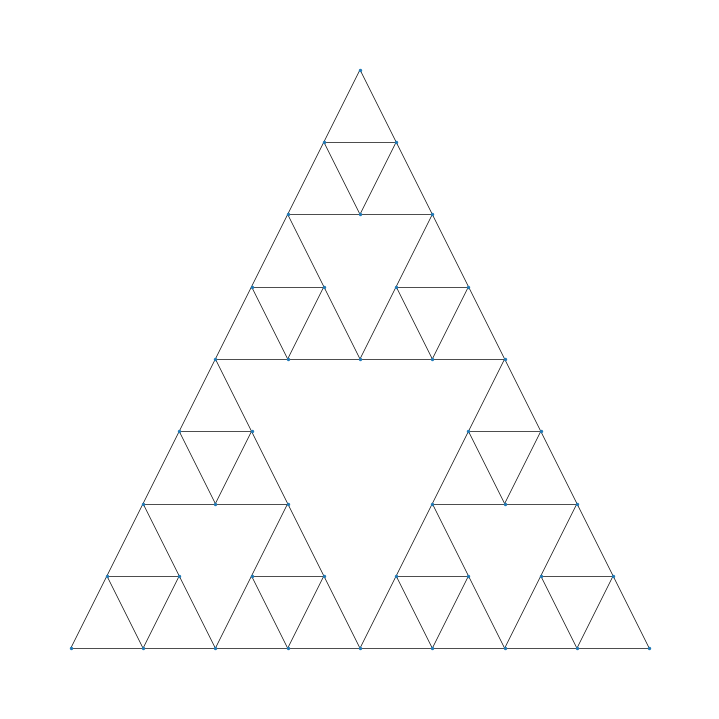

In [ ]:
sierpinski = draw_sierpinski_triangle(depth=3)

### 2. Рассчитать среднюю степень вершины фрактального графа

In [ ]:
def get_graph_info(G):
  G_neighbors = [len(G[node]) for node in G.nodes]
  print(f"Количество узлов в графе: {len(G.nodes)}\nКоличество связей в графе: {len(G.edges)}\nСредняя степень узла: {sum(G_neighbors)/len(G.nodes)}")

In [ ]:
get_graph_info(sierpinski)

Количество узлов в графе: 42
Количество связей в графе: 42
Средняя степень узла: 2.0


### 3. Построить распределение степеней вершин фрактального графа

In [ ]:
def get_degrees(G):
  dict_degrees = {}
  for node in G.nodes():
    curr_node_degree = G.degree(node)
    if curr_node_degree not in list(dict_degrees.keys()):
      dict_degrees[curr_node_degree] = 1
    else:
      dict_degrees[curr_node_degree] += 1
  dict_degrees = dict(sorted(dict_degrees.items()))
  return dict_degrees

In [ ]:
dict_degrees = get_degrees(sierpinski)
dict_degrees

{2: 42}

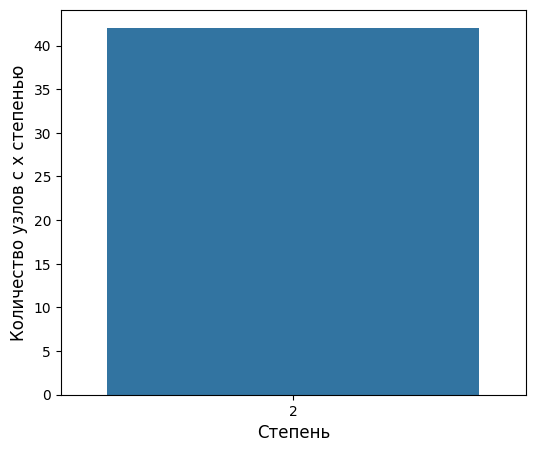

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=dict_degrees.keys(), y=dict_degrees.values(), ax=ax)
ax.set_ylabel('Количество узлов с x степенью', fontsize=12)
ax.set_xlabel('Степень', fontsize=12)
plt.show()

### 4. Модифицировать исходные формулы и параметры фрактала и повторить задание с 1 по 3.

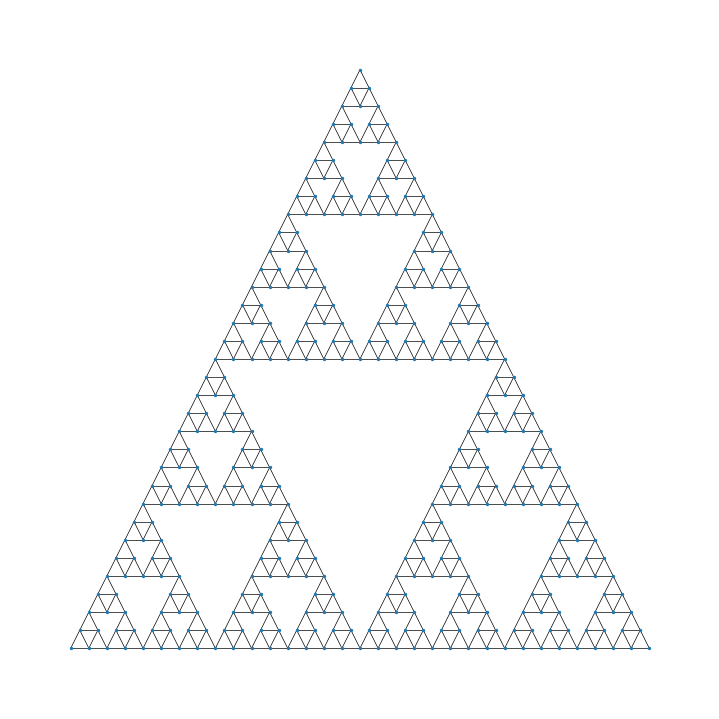

In [ ]:
sierpinski_ver2 = draw_sierpinski_triangle(depth=5)

In [ ]:
get_graph_info(sierpinski_ver2)

Количество узлов в графе: 366
Количество связей в графе: 366
Средняя степень узла: 2.0


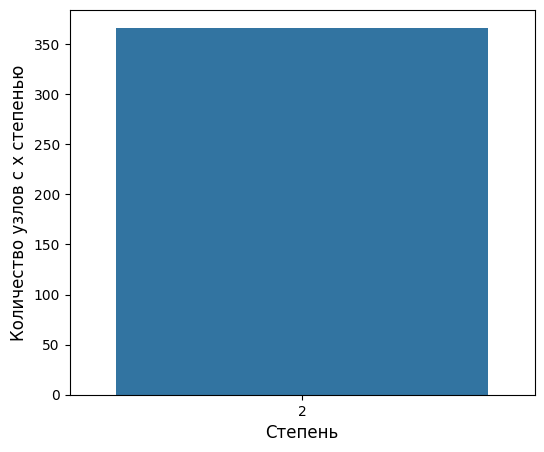

In [ ]:
dict_degrees_ver2 = get_degrees(sierpinski_ver2)

fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=dict_degrees_ver2.keys(), y=dict_degrees_ver2.values(), ax=ax)
ax.set_ylabel('Количество узлов с x степенью', fontsize=12)
ax.set_xlabel('Степень', fontsize=12)
plt.show()

Как можно заметить, вне зависимости от глубины треугольника Серпинского, количество узлов всегда будет равно количеству связей, а степень любой вершины треугольника будет всегда 2. Это объясняется тем, что каждая вершина связана ровно с двумя другими вершинами ее треугольника.